In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c3cadc6efe33ff89b13b6309439d9594


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | rawson
Processing Record 2 of Set 13 | severo-kurilsk
Processing Record 3 of Set 13 | arraial do cabo
Processing Record 4 of Set 13 | mahebourg
Processing Record 5 of Set 13 | dikson
Processing Record 6 of Set 13 | tatarsk
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | atuona
Processing Record 9 of Set 13 | avarua
Processing Record 10 of Set 13 | olot
Processing Record 11 of Set 13 | nikolskoye
Processing Record 12 of Set 13 | hobart
Processing Record 13 of Set 13 | lata
Processing Record 14 of Set 13 | east london
Processing Record 15 of Set 13 | puerto ayora
Processing Record 16 of Set 13 | butaritari
Processing Record 17 of Set 13 | niksic
Processing Record 18 of Set 13 | carnarvon
Processing Record 19 of Set 13 | buchanan
Processing Record 20 of Set 13 | saldanha
Processing Record 21 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set

Processing Record 36 of Set 16 | bethel
Processing Record 37 of Set 16 | novolakskoye
Processing Record 38 of Set 16 | nemuro
Processing Record 39 of Set 16 | toktogul
Processing Record 40 of Set 16 | ternate
Processing Record 41 of Set 16 | atar
Processing Record 42 of Set 16 | emba
Processing Record 43 of Set 16 | zaritap
Processing Record 44 of Set 16 | bairiki
Processing Record 45 of Set 16 | vaitupu
City not found. Skipping...
Processing Record 46 of Set 16 | samalaeulu
City not found. Skipping...
Processing Record 47 of Set 16 | saskylakh
Processing Record 48 of Set 16 | san jose
Processing Record 49 of Set 16 | leningradskiy
Processing Record 50 of Set 16 | paamiut
Processing Record 1 of Set 17 | burgeo
Processing Record 2 of Set 17 | longlac
City not found. Skipping...
Processing Record 3 of Set 17 | longyearbyen
Processing Record 4 of Set 17 | bonavista
Processing Record 5 of Set 17 | bansgaon
Processing Record 6 of Set 17 | aleksandrov gay
Processing Record 7 of Set 17 | mocu

Processing Record 21 of Set 20 | salinopolis
Processing Record 22 of Set 20 | ngukurr
City not found. Skipping...
Processing Record 23 of Set 20 | roma
Processing Record 24 of Set 20 | eyl
Processing Record 25 of Set 20 | nhulunbuy
Processing Record 26 of Set 20 | manicore
Processing Record 27 of Set 20 | hofn
Processing Record 28 of Set 20 | san jeronimo
Processing Record 29 of Set 20 | attawapiskat
City not found. Skipping...
Processing Record 30 of Set 20 | burnie
Processing Record 31 of Set 20 | tezu
Processing Record 32 of Set 20 | shubarshi
Processing Record 33 of Set 20 | amderma
City not found. Skipping...
Processing Record 34 of Set 20 | kenora
Processing Record 35 of Set 20 | mankera
Processing Record 36 of Set 20 | marrakesh
Processing Record 37 of Set 20 | las choapas
Processing Record 38 of Set 20 | klaksvik
Processing Record 39 of Set 20 | praia
Processing Record 40 of Set 20 | vilhena
Processing Record 41 of Set 20 | sindor
Processing Record 42 of Set 20 | abu kamal
Proc

Processing Record 7 of Set 24 | grants
Processing Record 8 of Set 24 | pemberton
Processing Record 9 of Set 24 | tynda
Processing Record 10 of Set 24 | dunmore town
Processing Record 11 of Set 24 | bagdarin
Processing Record 12 of Set 24 | tanete
Processing Record 13 of Set 24 | itoman
Processing Record 14 of Set 24 | del rio
Processing Record 15 of Set 24 | cabra
Processing Record 16 of Set 24 | bereda
Processing Record 17 of Set 24 | halalo
City not found. Skipping...
Processing Record 18 of Set 24 | santa rosa
Processing Record 19 of Set 24 | panguna
Processing Record 20 of Set 24 | surt
Processing Record 21 of Set 24 | sukpak
Processing Record 22 of Set 24 | samusu
City not found. Skipping...
Processing Record 23 of Set 24 | binga
Processing Record 24 of Set 24 | linjiang
Processing Record 25 of Set 24 | dombas
Processing Record 26 of Set 24 | inderborskiy
City not found. Skipping...
Processing Record 27 of Set 24 | tugulym
Processing Record 28 of Set 24 | marcona
City not found. S

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rawson,-43.3002,-65.1023,72.27,22,100,17.05,AR,2021-09-29 21:09:55
1,Severo-Kurilsk,50.6789,156.1250,51.94,90,60,3.65,RU,2021-09-29 21:09:55
2,Arraial Do Cabo,-22.9661,-42.0278,71.46,88,75,4.61,BR,2021-09-29 21:09:55
3,Mahebourg,-20.4081,57.7000,72.25,78,71,15.17,MU,2021-09-29 21:09:56
4,Dikson,73.5069,80.5464,33.03,98,100,16.49,RU,2021-09-29 21:09:56
5,Tatarsk,55.2190,75.9828,38.21,89,100,7.70,RU,2021-09-29 21:09:57
6,Ushuaia,-54.8000,-68.3000,44.26,61,75,16.11,AR,2021-09-29 21:05:46
7,Atuona,-9.8000,-139.0333,77.67,76,42,19.37,PF,2021-09-29 21:09:57
8,Avarua,-21.2078,-159.7750,80.65,74,74,9.22,CK,2021-09-29 21:09:58
9,Olot,42.1810,2.4901,69.15,94,97,2.26,ES,2021-09-29 21:09:58


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rawson,AR,2021-09-29 21:09:55,-43.3002,-65.1023,72.27,22,100,17.05
1,Severo-Kurilsk,RU,2021-09-29 21:09:55,50.6789,156.1250,51.94,90,60,3.65
2,Arraial Do Cabo,BR,2021-09-29 21:09:55,-22.9661,-42.0278,71.46,88,75,4.61
3,Mahebourg,MU,2021-09-29 21:09:56,-20.4081,57.7000,72.25,78,71,15.17
4,Dikson,RU,2021-09-29 21:09:56,73.5069,80.5464,33.03,98,100,16.49
5,Tatarsk,RU,2021-09-29 21:09:57,55.2190,75.9828,38.21,89,100,7.70
6,Ushuaia,AR,2021-09-29 21:05:46,-54.8000,-68.3000,44.26,61,75,16.11
7,Atuona,PF,2021-09-29 21:09:57,-9.8000,-139.0333,77.67,76,42,19.37
8,Avarua,CK,2021-09-29 21:09:58,-21.2078,-159.7750,80.65,74,74,9.22
9,Olot,ES,2021-09-29 21:09:58,42.1810,2.4901,69.15,94,97,2.26


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

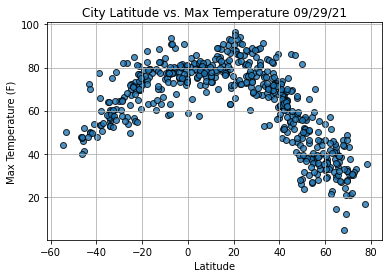

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

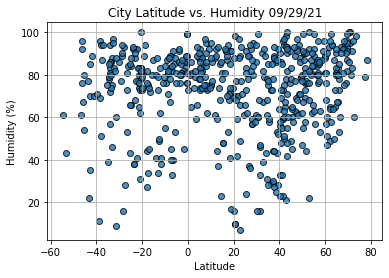

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

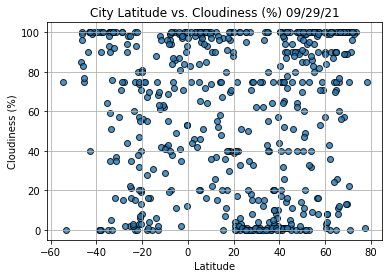

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

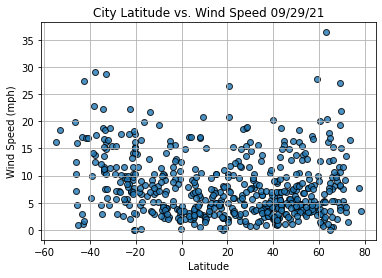

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2021-09-29 21:10:00
Lat                      -33.0153
Lng                       27.9116
Max Temp                     59.5
Humidity                       88
Cloudiness                    100
Wind Speed                  16.17
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
543    False
544     True
545    False
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Severo-Kurilsk,RU,2021-09-29 21:09:55,50.6789,156.1250,51.94,90,60,3.65
4,Dikson,RU,2021-09-29 21:09:56,73.5069,80.5464,33.03,98,100,16.49
5,Tatarsk,RU,2021-09-29 21:09:57,55.2190,75.9828,38.21,89,100,7.70
9,Olot,ES,2021-09-29 21:09:58,42.1810,2.4901,69.15,94,97,2.26
10,Nikolskoye,RU,2021-09-29 21:09:59,59.7035,30.7861,46.29,88,57,3.44
...,...,...,...,...,...,...,...,...,...
540,Salzwedel,DE,2021-09-29 21:13:39,52.8500,11.1500,51.03,82,33,15.37
541,Pemangkat,ID,2021-09-29 21:13:39,1.1667,108.9667,78.12,86,100,3.53
544,Port-Cartier,CA,2021-09-29 21:13:41,50.0334,-66.8654,55.62,77,91,4.41
546,Fez,MA,2021-09-29 21:13:41,34.0372,-4.9998,75.45,43,0,4.61


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

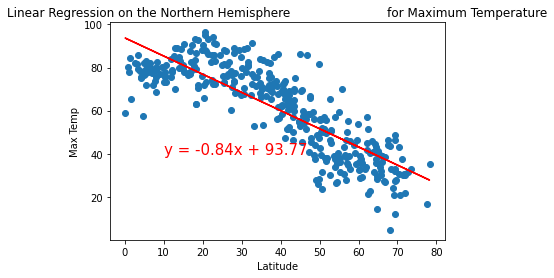

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

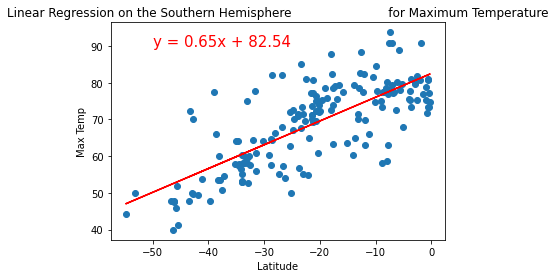

In [35]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

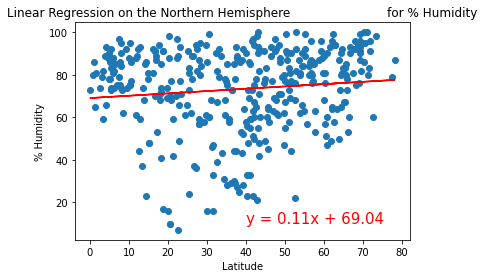

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

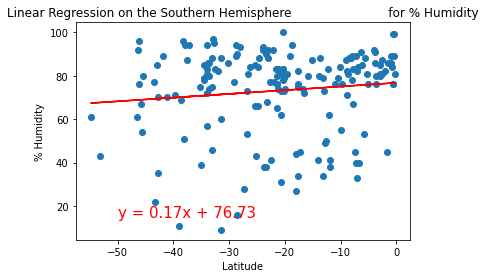

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

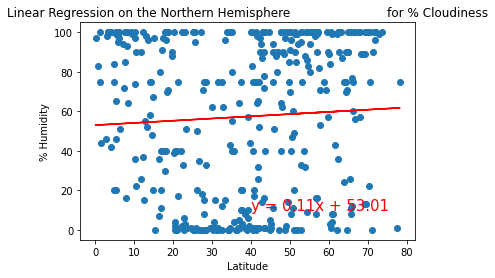

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(40,10))

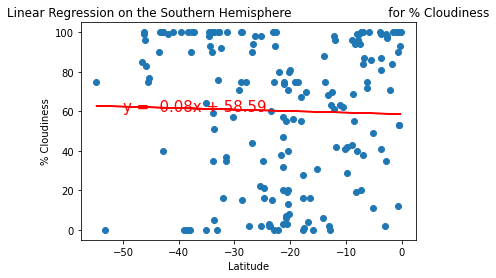

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

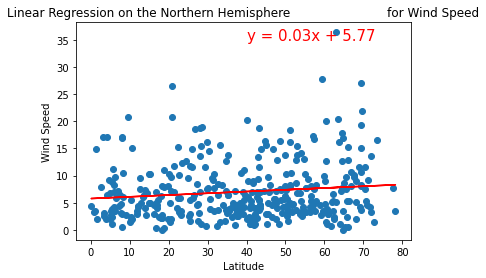

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

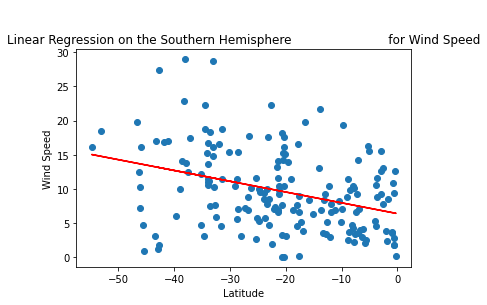

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))